## Functional charatetrization of de novo & random proteins using DeepFRI

### General workflow
1. Used DeepFRI to predict GO terms and EC classes for de novo proteins and random proteins
2. Set thresholds for DeepFRI Score
3. Use Revigo Web server to group GO Terms based on semantic similarity
4. Download Reigo results and use them to plot the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generate Revigo Input Files from DeepFRI Raw data

In [2]:
#### Load raw data ####

#load helping data
dn = pd.read_csv("denovo_results/raw/de_novo_proteins_data.csv", index_col=0)
dn = dn.rename(columns={"id": "Protein"})
dn = dn[["Protein", "mechanism", "max_pLDDT", "fraction_disorder_fldpnn", "age"]]


rd = pd.read_csv("random_results/raw/random_sequences_data.csv", index_col=0)
rd = rd.rename(columns={"id": "Protein"})
rd = rd[["Protein", "max_pLDDT", "fraction_disorder_fldpnn"]]


#Load de novo DeepFRI results and merge with helping data
dn_mf = pd.read_csv("denovo_results/raw/DeepFRI_MF_predictions.csv", index_col=None, skiprows=1)
dn_mf["Protein"] = dn_mf["Protein"].apply(lambda x: x.rsplit("_ranked")[0])

dn_bp = pd.read_csv("denovo_results/raw/DeepFRI_BP_predictions.csv", index_col=None, skiprows=1)
dn_bp["Protein"] = dn_bp["Protein"].apply(lambda x: x.rsplit("_ranked")[0])

dn_cc = pd.read_csv("denovo_results/raw/DeepFRI_CC_predictions.csv", index_col=None, skiprows=1)
dn_cc["Protein"] = dn_cc["Protein"].apply(lambda x: x.rsplit("_ranked")[0])

dn_mf = pd.merge(dn_mf, dn, on="Protein", how="left")
dn_bp = pd.merge(dn_bp, dn, on="Protein", how="left")
dn_cc = pd.merge(dn_cc, dn, on="Protein", how="left")


dn_mf = dn_mf[(dn_mf["mechanism"] == "denovo") | (dn_mf["mechanism"] == "denovo-intron")]
dn_bp = dn_bp[(dn_bp["mechanism"] == "denovo") | (dn_bp["mechanism"] == "denovo-intron")]
dn_cc = dn_cc[(dn_cc["mechanism"] == "denovo") | (dn_cc["mechanism"] == "denovo-intron")]

#Load random sequences DeepFRI results and merge with helping data
rd_mf = pd.read_csv("random_results/raw/DeepFRI_MF_predictions.csv", index_col=None, skiprows=1)
rd_mf["Protein"] = rd_mf["Protein"].apply(lambda x: x.rsplit("_ranked")[0])

rd_bp = pd.read_csv("random_results/raw/DeepFRI_BP_predictions.csv", index_col=None, skiprows=1)
rd_bp["Protein"] = rd_bp["Protein"].apply(lambda x: x.rsplit("_ranked")[0])

rd_cc = pd.read_csv("random_results/raw/DeepFRI_CC_predictions.csv", index_col=None, skiprows=1)
rd_cc["Protein"] = rd_cc["Protein"].apply(lambda x: x.rsplit("_ranked")[0])

rd_mf = pd.merge(rd_mf, rd, on="Protein", how="left")
rd_bp = pd.merge(rd_bp, rd, on="Protein", how="left")
rd_cc = pd.merge(rd_cc, rd, on="Protein", how="left")


In [3]:
# Aplly filters
def filter_data(df, min_DeepFri_score=0, min_pLDDT=0, max_disorder=1):
    df = df[
        (df["Score"] >= min_DeepFri_score) &
        (df["max_pLDDT"] >= min_pLDDT) &
        (df["fraction_disorder_fldpnn"] <= max_disorder)
    ]

    return df

# Filter only on DeepFRI score
dn_mf = filter_data(dn_mf, min_DeepFri_score=0.5)
dn_bp = filter_data(dn_bp, min_DeepFri_score=0.5)
dn_cc = filter_data(dn_cc, min_DeepFri_score=0.5)

rd_mf = filter_data(rd_mf, min_DeepFri_score=0.5)
rd_bp = filter_data(rd_bp, min_DeepFri_score=0.5)
rd_cc = filter_data(rd_cc, min_DeepFri_score=0.5)

# dn_mf["GO_term/EC_number"].to_csv("denovo_results/Revigo_input/denovo_MF_revigoIN_DeepFRI05.csv", index=None, header=None)
# dn_bp["GO_term/EC_number"].to_csv("denovo_results/Revigo_input/denovo_BP_revigoIN_DeepFRI05.csv", index=None, header=None)
# dn_cc["GO_term/EC_number"].to_csv("denovo_results/Revigo_input/denovo_CC_revigoIN_DeepFRI05.csv", index=None, header=None)

# rd_mf["GO_term/EC_number"].to_csv("random_results/Revigo_input/random_MF_revigoIN_DeepFRI05.csv", index=None, header=None)
# rd_bp["GO_term/EC_number"].to_csv("random_results/Revigo_input/random_BP_revigoIN_DeepFRI05.csv", index=None, header=None)
# rd_cc["GO_term/EC_number"].to_csv("random_results/Revigo_input/random_CC_revigoIN_DeepFRI05.csv", index=None, header=None)


## Analyze Fraction of de novo proteins and random proteins with a confidently predicted GO Term

TypeError: set_ticks() takes 2 positional arguments but 3 were given

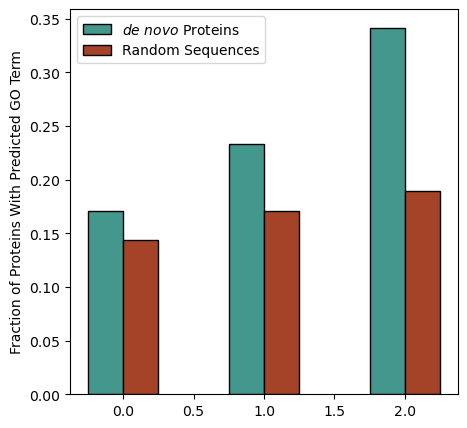

In [4]:
# Plot number of proteins with DeepFRI score above 0.5

data = {
    "Molecular Function": [(dn_mf.Protein.nunique()/2510), (rd_mf.Protein.nunique()/2507)],
    "Biological Process": [(dn_bp.Protein.nunique()/2510), (rd_bp.Protein.nunique()/2507)],
    "Cellular Component": [(dn_cc.Protein.nunique()/2510), (rd_cc.Protein.nunique()/2507)]
}

fig, ax = plt.subplots(1, 1, figsize=(5, 5))


# Extracting the labels and values from the dictionary
labels = list(data.keys())
values = np.array(list(data.values()))

# Extracting data for each group (MF, BP, CC)
group1_data = values[:, 0]
group2_data = values[:, 1]

# Setting the width of each bar
bar_width = 0.25

# Creating an array of indices to position bars
x = np.arange(len(labels))

# Plotting the grouped bar chart
ax.bar(x - bar_width/2, group1_data, bar_width, label=r"$\it{de}$ $\it{novo}$ Proteins", color="#43978D", edgecolor="black")
ax.bar(x + bar_width/2, group2_data, bar_width, label='Random Sequences', color="#A44328", edgecolor="black")


# Adding labels and titles



plt.legend()

ax.set_ylabel("Fraction of Proteins With Predicted GO Term")
#ax.set_xlabel("GO Term Categories")

ax.set_xticks(x, labels)
ax.set_ylim(0, 1)


# Show the plot
plt.tight_layout()

#plt.savefig("GO_term_fraction.pdf", dpi=300, bbox_inches="tight")

## Analyze impact of Age on GO Term prediction

In [5]:
#Assign age group for de novo proteins
def assign_Age_group(x):

    if x < 5:
        return 1
    elif x < 30:
        return 2
    else:
        return 3

dn["Age_group"] = dn["age"].apply(assign_Age_group)
dn_mf["Age_group"] = dn_mf["age"].apply(assign_Age_group)
dn_bp["Age_group"] = dn_bp["age"].apply(assign_Age_group)
dn_cc["Age_group"] = dn_cc["age"].apply(assign_Age_group)

TypeError: set_ticks() takes 2 positional arguments but 3 were given

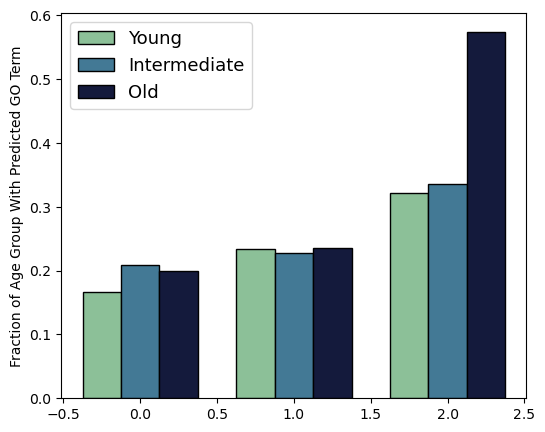

In [14]:
#Plot fraction of de novo proteins with DeepFRI score above 0.5 in each age group

data = {
    "Molecular Function": [dn_mf[dn_mf["Age_group"] == 1].Protein.nunique()/dn[dn["Age_group"] == 1].Protein.nunique(), dn_mf[dn_mf["Age_group"] == 2].Protein.nunique()/dn[dn["Age_group"] == 2].Protein.nunique(), dn_mf[dn_mf["Age_group"] == 3].Protein.nunique()/dn[dn["Age_group"] == 3].Protein.nunique()],
    "Biological Process": [dn_bp[dn_bp["Age_group"] == 1].Protein.nunique()/dn[dn["Age_group"] == 1].Protein.nunique(), dn_bp[dn_bp["Age_group"] == 2].Protein.nunique()/dn[dn["Age_group"] == 2].Protein.nunique(), dn_bp[dn_bp["Age_group"] == 3].Protein.nunique()/dn[dn["Age_group"] == 3].Protein.nunique()],
    "Cellular Component": [dn_cc[dn_cc["Age_group"] == 1].Protein.nunique()/dn[dn["Age_group"] == 1].Protein.nunique(), dn_cc[dn_cc["Age_group"] == 2].Protein.nunique()/dn[dn["Age_group"] == 2].Protein.nunique(), dn_cc[dn_cc["Age_group"] == 3].Protein.nunique()/dn[dn["Age_group"] == 3].Protein.nunique()]
}

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

labels = list(data.keys())
values = np.array(list(data.values()))

group1_data = values[:, 0]
group2_data = values[:, 1]
group3_data = values[:, 2]

bar_width = 0.25

x = np.arange(len(labels))
#colors = ["#60aba0", "#be5c71", "#8b9bb4"]
colors = ["#8cc098", "#437995", "#141a3c"]
ax.bar(x - bar_width, group1_data, bar_width, label="Young", color=colors[0], edgecolor="black")
ax.bar(x, group2_data, bar_width, label="Intermediate", color=colors[1], edgecolor="black")
ax.bar(x + bar_width, group3_data, bar_width, label="Old", color=colors[2], edgecolor="black")


plt.legend(fontsize=13)

ax.set_ylabel("Fraction of Age Group With Predicted GO Term")
#ax.set_xlabel("GO Term Categories")

ax.set_xticks(x, labels)

ax.set_ylim(0, 1)

plt.tight_layout()

#plt.savefig("GO_term_fraction_age.pdf", dpi=300, bbox_inches="tight")



In [7]:
#chi-squared test for age groups and GO terms
from scipy.stats import chisquare

mf_obs = [dn_mf[dn_mf["Age_group"] == 1].Protein.nunique(), dn_mf[dn_mf["Age_group"] == 2].Protein.nunique(), dn_mf[dn_mf["Age_group"] == 3].Protein.nunique()] 
mf_exp = np.array([dn[dn["Age_group"] == 1].Protein.nunique(), dn[dn["Age_group"] == 2].Protein.nunique(), dn[dn["Age_group"] == 3].Protein.nunique()]) * (dn_mf.Protein.nunique()/dn.Protein.nunique())

bp_obs = [dn_bp[dn_bp["Age_group"] == 1].Protein.nunique(), dn_bp[dn_bp["Age_group"] == 2].Protein.nunique(), dn_bp[dn_bp["Age_group"] == 3].Protein.nunique()]
bp_exp = np.array([dn[dn["Age_group"] == 1].Protein.nunique(), dn[dn["Age_group"] == 2].Protein.nunique(), dn[dn["Age_group"] == 3].Protein.nunique()]) * (dn_bp.Protein.nunique()/dn.Protein.nunique())

cc_obs = [dn_cc[dn_cc["Age_group"] == 1].Protein.nunique(), dn_cc[dn_cc["Age_group"] == 2].Protein.nunique(), dn_cc[dn_cc["Age_group"] == 3].Protein.nunique()]
cc_exp = np.array([dn[dn["Age_group"] == 1].Protein.nunique(), dn[dn["Age_group"] == 2].Protein.nunique(), dn[dn["Age_group"] == 3].Protein.nunique()]) * (dn_cc.Protein.nunique()/dn.Protein.nunique())

mf_chi_square = chisquare(mf_obs, mf_exp)
bp_chi_square = chisquare(bp_obs, bp_exp)
cc_chi_square = chisquare(cc_obs, cc_exp)

print(f"P-value for MF: {mf_chi_square.pvalue}")
print(f"P-value for BP: {bp_chi_square.pvalue}")
print(f"P-value for CC: {cc_chi_square.pvalue}")


P-value for MF: 0.35418312919219463
P-value for BP: 0.9881972761266784
P-value for CC: 5.727017155884036e-08


In [8]:
print(f"Observed MF: {mf_obs}")
print(f"Expected MF: {mf_exp}")

print(f"Observed BP: {bp_obs}")
print(f"Expected BP: {bp_exp}")

print(f"Observed CC: {cc_obs}")
print(f"Expected CC: {cc_exp}")

Observed MF: [368, 23, 39]
Expected MF: [377.68647786  18.86717192  33.44635022]
Observed BP: [515, 25, 46]
Expected BP: [514.70761867  25.71200638  45.58037495]
Observed CC: [709, 37, 112]
Expected CC: [753.61627443  37.64658955  66.73713602]


(0.0, 1.0)

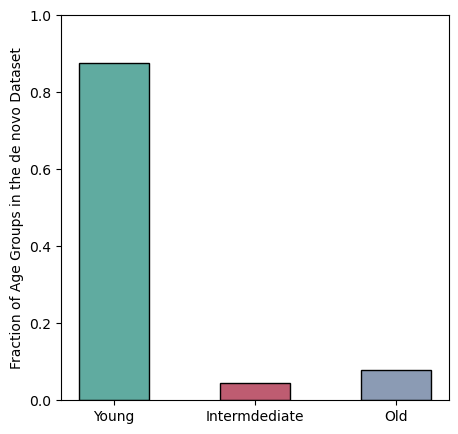

In [9]:
#Supplement figure with Age group destribution
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(["Young", "Intermdediate", "Old"], (dn.groupby("Age_group")["Protein"].nunique().values)/len(dn), color=["#60aba0", "#be5c71", "#8b9bb4"], edgecolor="black", width=0.5)

ax.set_ylabel("Fraction of Age Groups in the de novo Dataset")

ax.set_ylim(0, 1)

## Plot Overview of predicted GO Terms

In [10]:
#load revigo results
dn_mf_revigo = pd.read_csv("denovo_results/Revigo_output/Revigo_MF_DeepFRI05_Scatterplot_small.tsv", index_col=0, sep="\t")
dn_bp_revigo = pd.read_csv("denovo_results/Revigo_output/Revigo_BP_DeepFRI05_Scatterplot_small.tsv", index_col=0, sep="\t")
dn_cc_revigo = pd.read_csv("denovo_results/Revigo_output/Revigo_CC_DeepFRI05_Scatterplot_small.tsv", index_col=0, sep="\t")

rd_mf_revigo = pd.read_csv("random_results/Revigo_output/Revigo_MF_DeepFRI05_Scatterplot_small.tsv", index_col=0, sep="\t")
rd_bp_revigo = pd.read_csv("random_results/Revigo_output/Revigo_BP_DeepFRI05_Scatterplot_small.tsv", index_col=0, sep="\t")
rd_cc_revigo = pd.read_csv("random_results/Revigo_output/Revigo_CC_DeepFRI05_Scatterplot_small.tsv", index_col=0, sep="\t")


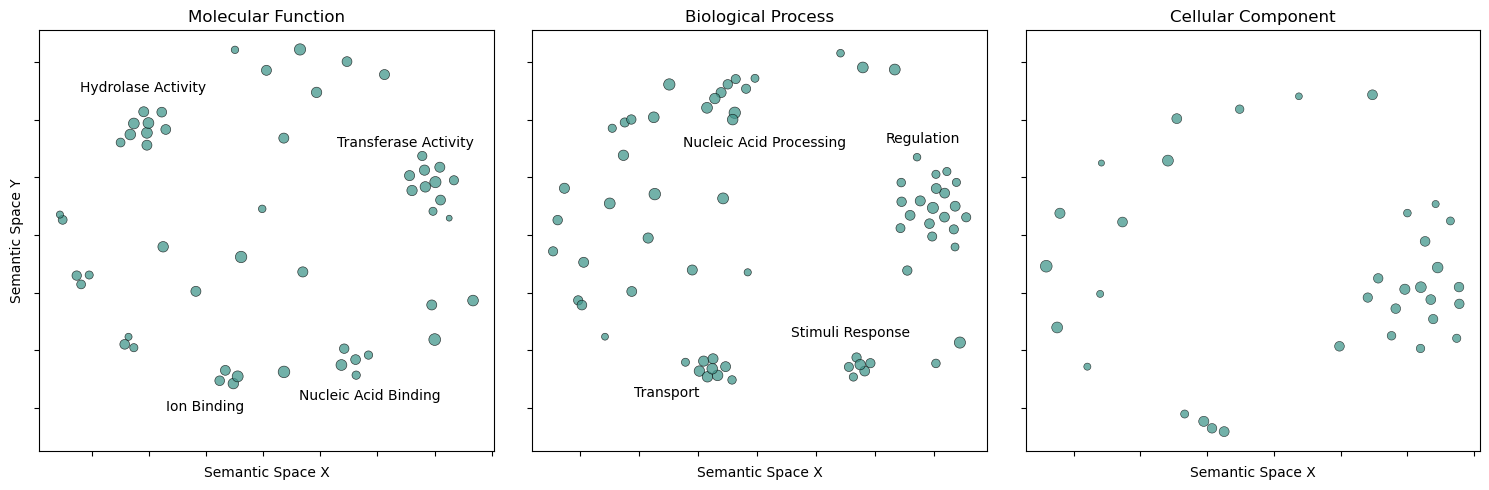

In [11]:
# create 3x1 scatterplot of de novo revigo results with seaborn
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(data=dn_mf_revigo, x="PC_0", y="PC_1", size="LogSize", ax=axes[0], color="#43978D", alpha=0.75, edgecolor="black")
sns.scatterplot(data=dn_bp_revigo, x="PC_0", y="PC_1", size="LogSize", ax=axes[1], color="#43978D", alpha=0.75, edgecolor="black")
sns.scatterplot(data=dn_cc_revigo, x="PC_0", y="PC_1", size="LogSize", ax=axes[2], color="#43978D", alpha=0.75, edgecolor="black")

axes[0].set_title("Molecular Function")
axes[1].set_title("Biological Process")
axes[2].set_title("Cellular Component")

axes[0].legend([],[], frameon=False)
axes[1].legend([],[], frameon=False)
axes[2].legend([],[], frameon=False)

axes[0].set_xlabel("Semantic Space X")
axes[1].set_xlabel("Semantic Space X")
axes[2].set_xlabel("Semantic Space X")

axes[0].set_ylabel("Semantic Space Y")

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])

axes[0].set_yticklabels([])

#add labels to specific points
#Molecular function plot
transferase_x, transferase_y = dn_mf_revigo.loc["GO:0016746", ["PC_0", "PC_1"]]
axes[0].text(transferase_x - 3.1, transferase_y + 1.75, "Transferase Activity", fontsize=10)

hyrdolase_x, hyrdolase_y = dn_mf_revigo.loc["GO:0016788", ["PC_0", "PC_1"]]
axes[0].text(hyrdolase_x - 1.9, hyrdolase_y + 1.35, "Hydrolase Activity", fontsize=10)

ion_binding_x, ion_binding_y = dn_mf_revigo.loc["GO:0046914", ["PC_0", "PC_1"]]
axes[0].text(ion_binding_x - 2.5, ion_binding_y - 1.5, "Ion Binding", fontsize=10)

na_binding_x, na_binding_y = dn_mf_revigo.loc["GO:0003723", ["PC_0", "PC_1"]]
axes[0].text(na_binding_x - 1.5, na_binding_y - 1.5, "Nucleic Acid Binding", fontsize=10)

#Biological process plot
regulation_x, regulation_y = dn_bp_revigo.loc["GO:0048522", ["PC_0", "PC_1"]]
axes[1].text(regulation_x - 1.5, regulation_y + 3.5, "Regulation", fontsize=10)

na_process_x, na_process_y = dn_bp_revigo.loc["GO:0034654", ["PC_0", "PC_1"]]
axes[1].text(na_process_x - 1.75, na_process_y - 1.5, "Nucleic Acid Processing", fontsize=10)

stimulus_x, stimulus_y = dn_bp_revigo.loc["GO:0009605", ["PC_0", "PC_1"]]
axes[1].text(stimulus_x - 2.5, stimulus_y + 1.5, "Stimuli Response", fontsize=10)

transport_x, transport_y = dn_bp_revigo.loc["GO:0015833", ["PC_0", "PC_1"]]
axes[1].text(transport_x - 1.75, transport_y - 1.5, "Transport", fontsize=10)




plt.tight_layout()




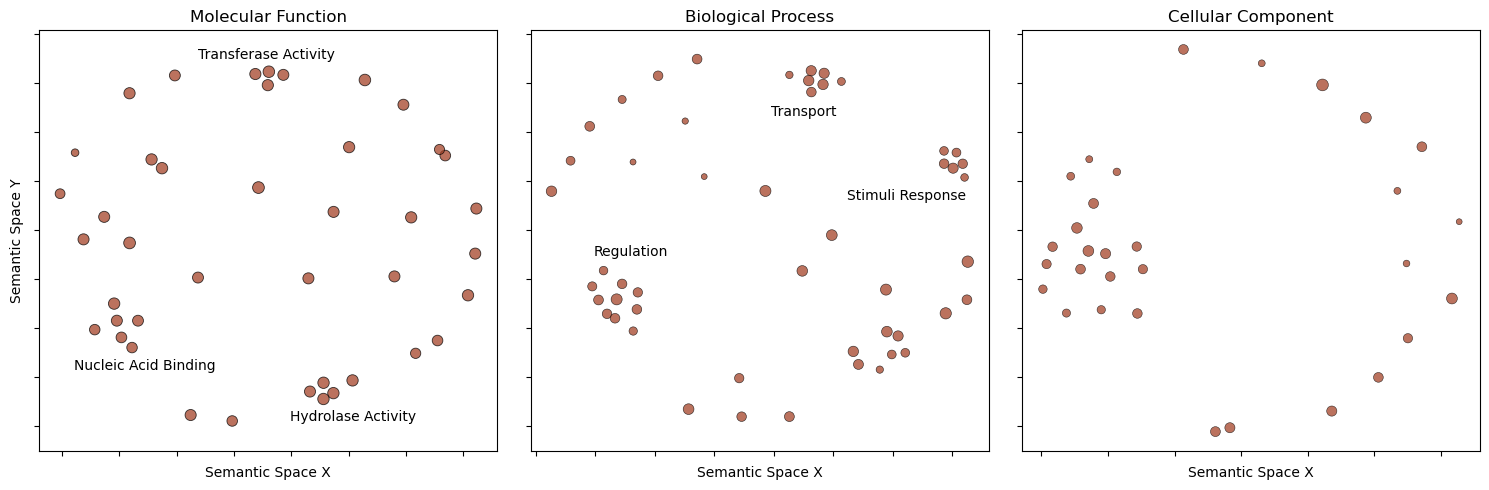

In [12]:
# create 3x1 scatterplot of random sequences revigo results with seaborn
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(data=rd_mf_revigo, x="PC_0", y="PC_1", size="LogSize", ax=axes[0], color="#A44328", alpha=0.75, edgecolor="black")
sns.scatterplot(data=rd_bp_revigo, x="PC_0", y="PC_1", size="LogSize", ax=axes[1], color="#A44328", alpha=0.75, edgecolor="black")
sns.scatterplot(data=rd_cc_revigo, x="PC_0", y="PC_1", size="LogSize", ax=axes[2], color="#A44328", alpha=0.75, edgecolor="black")

axes[0].set_title("Molecular Function")
axes[1].set_title("Biological Process")
axes[2].set_title("Cellular Component")

axes[0].legend([],[], frameon=False)
axes[1].legend([],[], frameon=False)
axes[2].legend([],[], frameon=False)

axes[0].set_xlabel("Semantic Space X")
axes[1].set_xlabel("Semantic Space X")
axes[2].set_xlabel("Semantic Space X")

axes[0].set_ylabel("Semantic Space Y")

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])

axes[0].set_yticklabels([])

#add labels to specific points
#Molecular function plot
transferase_x, transferase_y = rd_mf_revigo.loc["GO:0008168", ["PC_0", "PC_1"]]
axes[0].text(transferase_x - 2.0, transferase_y  + 0.6, "Transferase Activity", fontsize=10)

na_binding_x, na_binding_y = rd_mf_revigo.loc["GO:0043565", ["PC_0", "PC_1"]]
axes[0].text(na_binding_x - 1.5, na_binding_y - 2, "Nucleic Acid Binding", fontsize=10)

hyrdolase_x, hyrdolase_y = rd_mf_revigo.loc["GO:0016788", ["PC_0", "PC_1"]]
axes[0].text(hyrdolase_x - 1.5, hyrdolase_y - 1.15, "Hydrolase Activity", fontsize=10)

#Biological process plot
regulation_x, regulation_y = rd_bp_revigo.loc["GO:0048522", ["PC_0", "PC_1"]]
axes[1].text(regulation_x - 1.5, regulation_y + 1.5, "Regulation", fontsize=10)

transport_x, transport_y = rd_bp_revigo.loc["GO:0006811", ["PC_0", "PC_1"]]
axes[1].text(transport_x - 1.75, transport_y - 1.3, "Transport", fontsize=10)

stimulus_x, stimulus_y = rd_bp_revigo.loc["GO:0009605", ["PC_0", "PC_1"]]
axes[1].text(stimulus_x - 3.25, stimulus_y - 1.5, "Stimuli Response", fontsize=10)


plt.tight_layout()
